# Huygens principle

The Huygens principle states, that each point is space which which is experiencing an electromagnetic wave is the source of a spherical wave. This means nothing else, that any wave can be expanded into a superposition of spherical waves, which is the fundamental of Mie scattering for example. Yet, the overall statement of this principle is a bit unphysical. Classically, accelerated charges are the source of electromagnetic waves. If there is no accelerated charge, there is no wave.  

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep,time
from ipycanvas import MultiCanvas, hold_canvas,Canvas
import matplotlib as mpl
import matplotlib.cm as cm


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# default values for plotting
plt.rcParams.update({'font.size': 12,
                     'axes.titlesize': 18,
                     'axes.labelsize': 16,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 16,
                     'ytick.labelsize' : 16,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 



## Diffraction pattern of a single slit

Here we would like to have a look at the Huygens principle by playing around with the interference from multiple sources arranged on a line. Using this way we can simulate the diffraction patterns from a slit. So here is our spherical wave function again.

In [13]:
def spherical_wave(k,omega,r,r0,t):
    k=np.linalg.norm(k)
    d=np.linalg.norm(r-r0)
    return( np.exp(1j*(k*d-omega*t))/d)

The next cell defines the space for our calculation again. The value of $d$ denotes the slit width, which we want to vary to see the effect of changing slit width vs. wavelength, which we chose to be $\lambda=532$ nm.

In [16]:
x=np.linspace(-5e-6,5e-6,300)
z=np.linspace(0,10e-6,300)

X,Z=np.meshgrid(x,z)
r=np.array([X,0,Z],dtype=object)

wavelength=532e-9
k0=2*np.pi/wavelength
c=299792458
omega0=k0*c
k=k0*np.array([0,0,1.])

d=2e-6

The next cell sums up the electric field of 200 spherical waves in the x-z plane such that we can plot the intensity or the field in space. 

In [17]:
def slit(d,r):
    field=0
    for x0 in np.linspace(-d/2,d/2,200):    
        r0=np.array([x0,0,-0.1e-6])
        field=field+spherical_wave(k,omega0,r,r0,0)

    field=field/np.max(field)
    return(field)


Let us plot the wavefronts and the intensity pattern in space. As the intensity decays strongly with distance from the slit, we do that by taking the log of the intensity.

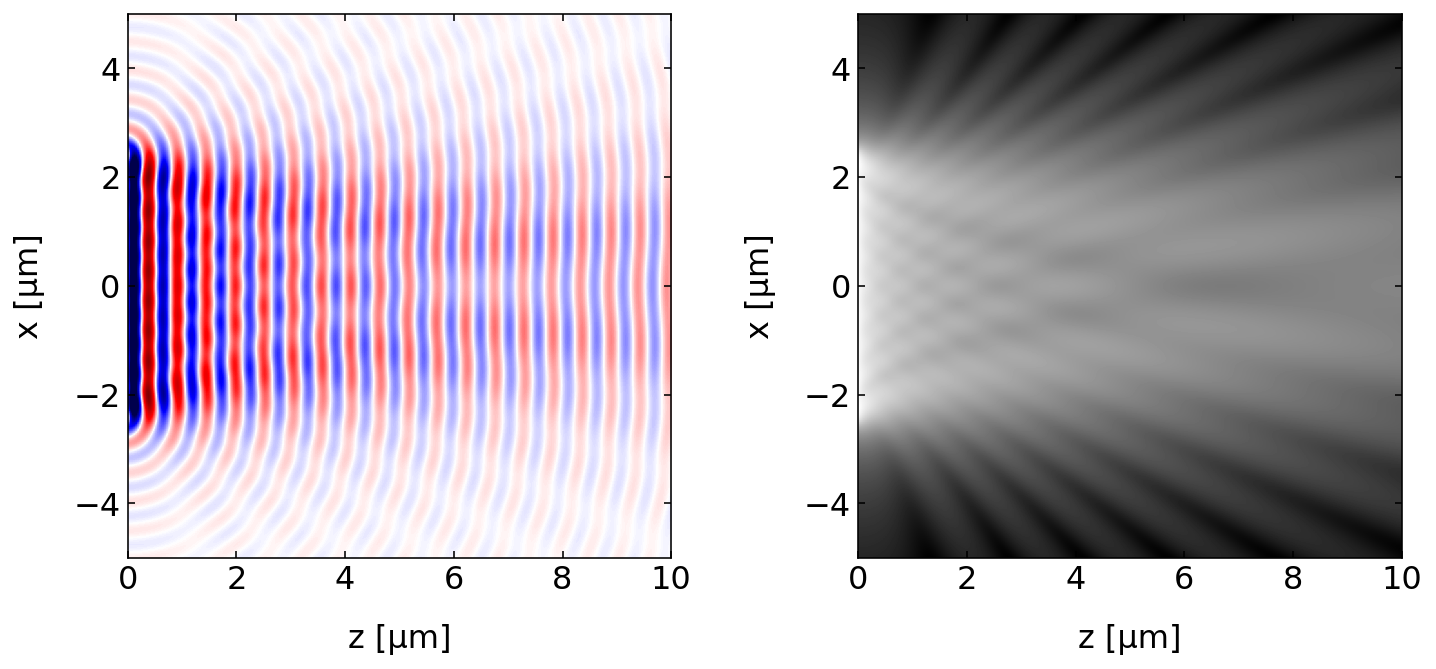

In [21]:
extent = np.min(z)*1e6, np.max(z)*1e6,np.min(x)*1e6, np.max(x)*1e6
d=5e-6
field=slit(d,r)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(np.real(field.transpose()),extent=extent,vmin=-1,vmax=1,cmap='seismic')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')


plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(field.transpose())**2),extent=extent,cmap='gray')
plt.xlabel('z [µm]')
plt.ylabel('x [µm]')

plt.show()

## Farfield vs. nearfield

You might remember that there is a difference between the nearfield and the farfield intensity pattern begind a slit or in general. The farfield approximation is the usual approximation which we deal with in the undergraduate lectures. It measures the intensity at large distance. The Fresnel approximation is looking at the near fields, where the wavefronts are curved and this is of relevance for the diffraction pattern. Let us look at two distances, $d=1$ µm and $d=100$ µm to show the difference between both intensity patterns.

In [22]:
x1=np.linspace(-10e-6,10e-6,1000)
z=np.array([1e-6])
X,Z=np.meshgrid(x1,z)
r=np.array([X,0,Z],dtype=object)
d=5e-6

## near field calculation
field=slit(d,r)

x2=np.linspace(-50e-6,50e-6,1000)
z=np.array([100e-6])
X,Z=np.meshgrid(x2,z)
r=np.array([X,0,Z],dtype=object)

## far field calculation
field1=slit(d,r)

The two plots below show the drastic difference between the diffraction pattern in the near field and the far field. The near field resembles to be a shadow picture, while the far field intensity pattern is considerable wider than the slit. This even becomes worse, if we make the slit narrower. 

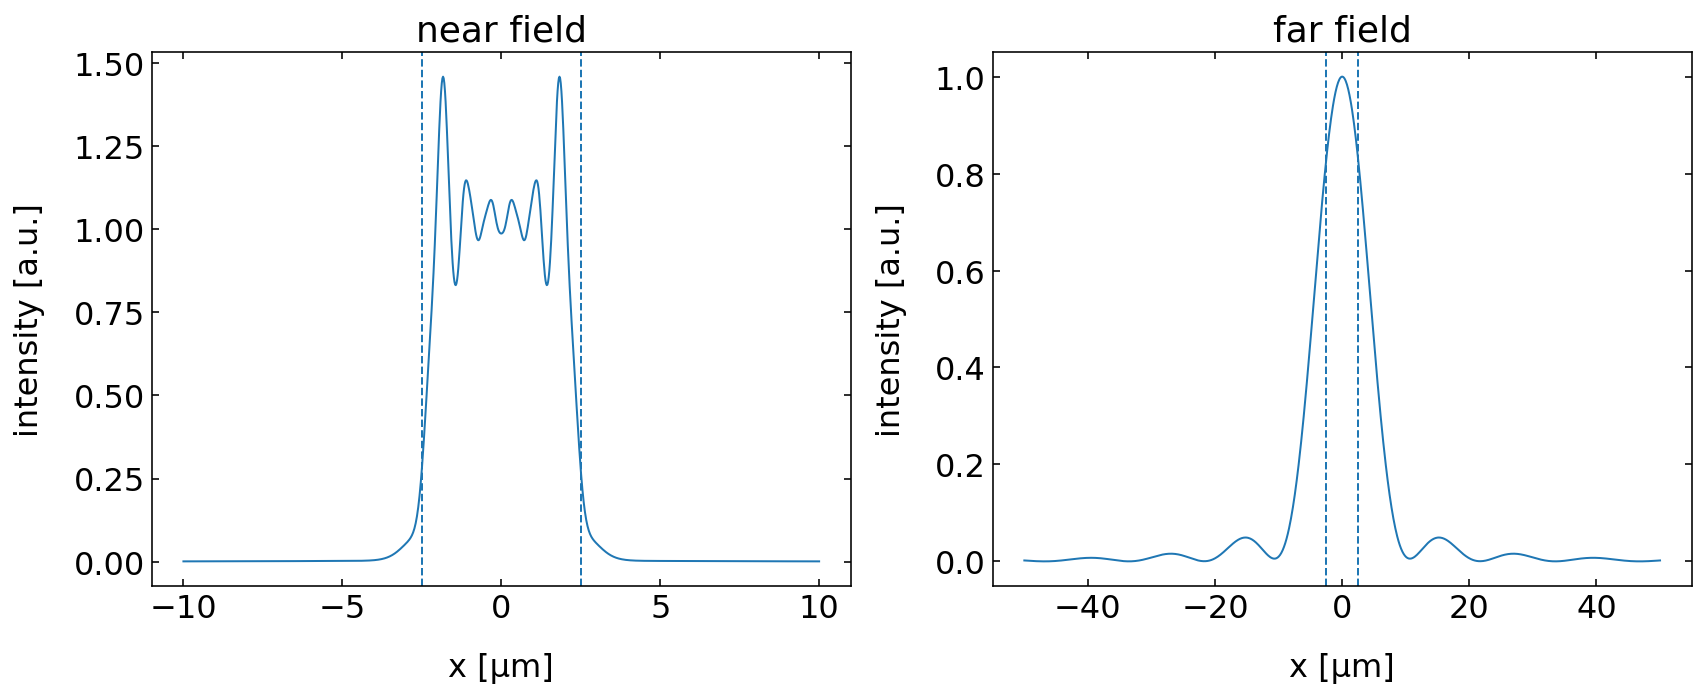

In [23]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(x1*1e6,np.abs(field[0,:])**2)
plt.axvline(x=-d/2*1e6,ls='--')
plt.axvline(x=d/2*1e6,ls='--')
plt.title("near field")
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')


plt.subplot(1,2,2)
plt.plot(x2*1e6,np.abs(field1[0,:])**2)

plt.axvline(x=-d/2*1e6,ls='--')
plt.axvline(x=d/2*1e6,ls='--')
plt.title("far field")
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.tight_layout()

plt.show()

## Comparison to the analytical solution

We know now the numerical solution summing up many spherical waves. If we calculate the analytical pattern, we actually do the same thing. We sum up many spherical waves for large distances. The analytical result we obtain for a single slit is


\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2
\end{equation}

where 
\begin{equation}
\delta=\frac{\pi d}{\lambda}\sin(\theta)
\end{equation}

and $d$ is the slit width. $\theta$ is the diffraction angle. So lets compare our numerical calculation with the analytical prediction. 

In [24]:
def single_slit(d,z,x):
    theta=np.arctan2(x,z)
    delta=np.pi*d/wavelength*np.sin(theta)
    return((np.sin(delta)/delta)**2)

In [25]:
intensity=single_slit(d,100e-6,x2)

The plot below nicely shows that we are not to bad with our numerical simulation and the 200 sources. You may want to further explore how the number of sources used changes the result. How many sources would be enough? 

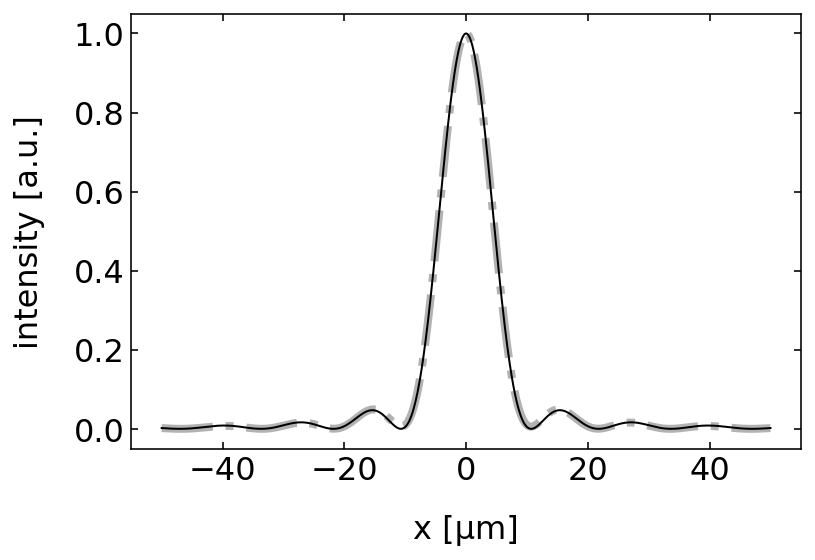

In [26]:
plt.plot(x2*1e6,np.abs(field1[0,:])**2,'k-.',lw=4,alpha=0.3)
plt.plot(x2*1e6,intensity,'k')
plt.xlabel('x [µm]')
plt.ylabel('intensity [a.u.]')
plt.show()

You may also want to explore what the wavelength and the slit width change on the diffraction pattern. The next step would be to show the diffraction pattern from a grating or even to show the diffraction from a spherical particles, where the sources are spread over spherical region is space. I would leave this effort to you and your project.

Create the intensity pattern generated by a grating with 10 slits of width $d$ and distance $D$. Compare that to the analytical solution.

\begin{equation}
I=I_{0}\left (\frac{\sin(\delta)}{\delta}\right )^2\left (\frac{\sin(N\gamma)}{\sin(\gamma)}\right )^2
\end{equation}


where 
\begin{equation}
\gamma=\frac{\pi D}{\lambda}\sin(\theta)
\end{equation}

and $N$ is the number of slits.